In [37]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
#for test train split
from sklearn.model_selection import train_test_split
#for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [38]:
# setting the option to display all the columns
pd.set_option('display.max_columns', None)

In [77]:
data = pd.read_csv("attrition.csv")
data.head(10)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
5,32,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,3,1,4,Single,3068,No,8,2,7,7,3,6,2
6,59,0,Travel_Rarely,Research & Development,Medical,3,Female,4,1,1,Married,2670,Yes,12,2,1,0,0,0,3
7,30,0,Travel_Rarely,Research & Development,Life Sciences,4,Male,3,1,3,Divorced,2693,No,1,3,1,0,0,0,24
8,38,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,2,3,3,Single,9526,No,10,3,9,7,1,8,23
9,36,0,Travel_Rarely,Research & Development,Medical,3,Male,3,2,3,Married,5237,No,17,2,7,7,7,7,27


In [40]:
# get summary and info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

In [41]:
data.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [42]:
# check for nulls
display(data.isnull().any())


Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
EducationField             False
EnvironmentSatisfaction    False
Gender                     False
JobInvolvement             False
JobLevel                   False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
OverTime                   False
TotalWorkingYears          False
WorkLifeBalance            False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
DistanceFromHome           False
dtype: bool

We can see there are no nulls in the data 

In [62]:
data = pd.get_dummies(data)
data.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,2,4,5993,8,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,49,0,3,2,2,2,5130,10,3,10,7,1,7,8,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,37,1,4,2,1,3,2090,7,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,33,0,4,3,1,3,2909,8,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,27,0,1,3,1,2,3468,6,3,2,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [64]:
# get frequency of values and their percent in attrition column
attrition_freq = data[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()), 2)

print(attrition_freq)

   Attrition  frequency_percent
0       1233              83.88
1        237              16.12


## 1. Model using all the features 

In [63]:
#Separating Features and Target variables
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [65]:
# rescale features using standardization. Must for Logistic regression

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [66]:
# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

In [67]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [68]:
model = LogisticRegression()

In [69]:
model.fit(X_train, y_train) #Train the Model


LogisticRegression()

In [70]:
y_pred = model.predict(X_test) #Use the Model for prediction


In [72]:
# form confusion matrix and find accuracy scores

c= confusion_matrix(y_test,y_pred)
c

array([[360,  10],
       [ 45,  26]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8752834467120182

In [74]:
# full report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.72      0.37      0.49        71

    accuracy                           0.88       441
   macro avg       0.81      0.67      0.71       441
weighted avg       0.86      0.88      0.86       441



In [75]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.6695850780357823

In [24]:
## precision for each class = tp/(tp+fp)   # how correct it is for positive
## recall = tp/(tp+fn)   # supposed to have been all positive
## accuracy = tp+tn/(tp+tn+fp+fn)

## Use features from EDA

In [81]:
data_cp = data[["Age", "BusinessTravel", "JobInvolvement", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "OverTime", "TotalWorkingYears",
"WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "DistanceFromHome", "Attrition"
]].copy()
data_enc = pd.get_dummies(data_cp)
data_enc.head()

,Age,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,DistanceFromHome,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,3,4,5993,8,1,6,4,5,1,1,0,0,1,0,0,1,0,1
1,49,2,2,5130,10,3,10,7,7,8,0,0,1,0,0,1,0,1,0
2,37,2,3,2090,7,3,0,0,0,2,1,0,0,1,0,0,1,0,1
3,33,3,3,2909,8,3,8,7,0,3,0,0,1,0,0,1,0,0,1
4,27,3,2,3468,6,3,2,2,2,2,0,0,0,1,0,1,0,1,0


In [82]:
#Separating Features and Target variables
X = data_enc.drop(['Attrition'], axis=1)
y = data_enc['Attrition']

In [83]:
# rescale features using standardization. Must for Logistic regression

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [84]:
# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

In [85]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [86]:
model = LogisticRegression()

In [87]:
model.fit(X_train, y_train) #Train the Model


LogisticRegression()

In [88]:
y_pred = model.predict(X_test) #Use the Model for prediction


In [89]:
# form confusion matrix and find accuracy scores

c= confusion_matrix(y_test,y_pred)
c

array([[357,  13],
       [ 53,  18]], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8503401360544217

In [91]:
# full report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       370
           1       0.58      0.25      0.35        71

    accuracy                           0.85       441
   macro avg       0.73      0.61      0.63       441
weighted avg       0.82      0.85      0.82       441



In [92]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.6091929958127142

### We can see that Model 2 performs bit poorer than Model 1, but the diff is not large and Model 2 is much less complex 

## mODEL 3: Use statistical feature selection methods 

In [93]:
#Separating Features and Target variables
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

          Feature   p-value
0        OverTime  0.000000
1   MaritalStatus  0.000010
2  BusinessTravel  0.001409
3  EducationField  0.003415
          Numerical_Feature    F-Score      p values
0        YearsInCurrentRole  30.952845  3.370000e-08
1      YearsWithCurrManager  26.787873  2.730000e-07
2         TotalWorkingYears  25.194796  6.106000e-07
3                  JobLevel  24.664724  7.985000e-07
4             MonthlyIncome  21.115360  4.861600e-06
5                       Age  20.660969  6.133900e-06
6            YearsAtCompany  19.340178  1.207730e-05
7            JobInvolvement  18.320102  2.041920e-05
8           JobSatisfaction  15.968064  6.902110e-05
9          DistanceFromHome  11.238756  8.302892e-04
10  EnvironmentSatisfaction  10.923440  9.823866e-04
11  YearsSinceLastPromotion   1.679304  1.953082e-01
12          WorkLifeBalance   1.632466  2.016510e-01
Dropped columns: []


C:\Users\satish\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


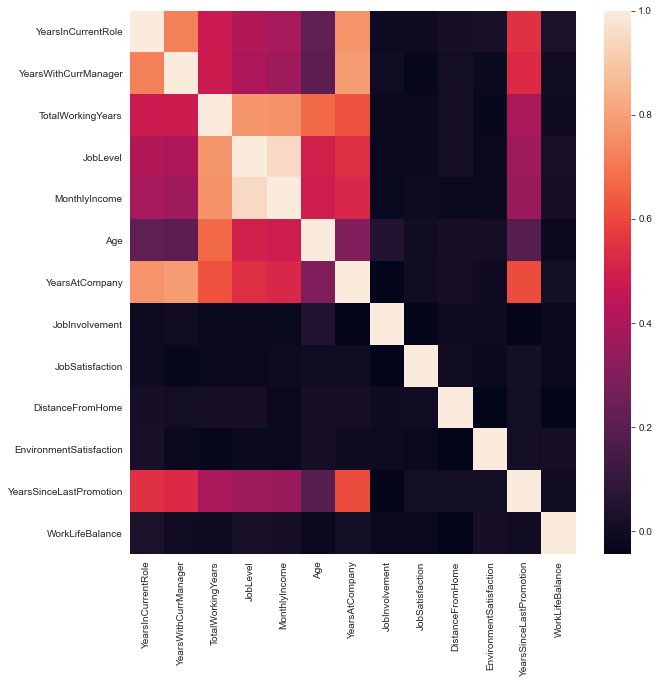

In [100]:
# rEFERENCE: https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)

print(chi2_result)

# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values,
'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

print(ANOVA_F_table)

# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:20,0].to_list()

# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat)

# save the names of columns to be dropped in a list
drop_columns_list = ANOVA_F_table.iloc[20:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())

# function to drop these columns
def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

print("Dropped columns:", drop_columns_list)
# apply to X_train
col_to_drop(X_train, drop_columns_list)

In [98]:
X_train.columns

Index(['Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DistanceFromHome'],
      dtype='object')

## The features are kind of similar to EDA method

## Use SMOTE to balance class

In [110]:
#Separating Features and Target variables
data_enc = pd.get_dummies(data)
X = data_enc.drop(['Attrition'], axis=1)
y = data_enc['Attrition']

# rescale features using standardization. Must for Logistic regression

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

In [111]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state = 10)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [112]:
print(y_train_smote.value_counts())

1    863
0    863
Name: Attrition, dtype: int64


In [113]:
model.fit(X_train_smote, y_train_smote) #Train the Model
y_pred = model.predict(X_test) #Use the Model for prediction


In [114]:
y_pred = model.predict(X_test) #Use the Model for prediction


In [115]:
# form confusion matrix and find accuracy scores

c= confusion_matrix(y_test,y_pred)
c

array([[275,  95],
       [ 23,  48]], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7324263038548753

In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

In [118]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7096497906357061

In [119]:
# full report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       370
           1       0.34      0.68      0.45        71

    accuracy                           0.73       441
   macro avg       0.63      0.71      0.64       441
weighted avg       0.83      0.73      0.76       441



### WE CAN SEE THAT THOUGH the SMOTE model has some decrease in accuracy, it has a big improvement in case of precision and recall of the Target 'Yes' class as it's balanced now

## AUROC curve

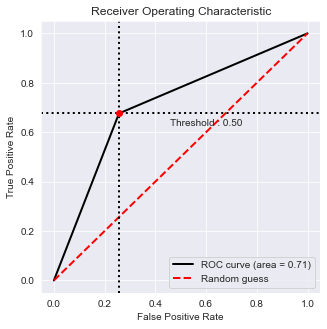

In [36]:
#!pip install plot_metric
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt

# Visualisation with plot_metric
bc = BinaryClassification(y_test, model.predict(X_test), labels=["0", "1"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

## Try statsmodel 

In [47]:
import statsmodels.api as sm


In [55]:
X = sm.add_constant(X)


In [56]:
# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

In [57]:
# there are many parameters to tune in this
model = sm.Logit(y_train, X_train).fit()

         Current function value: 0.310506
         Iterations: 35


C:\Users\satish\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1002
Method:                           MLE   Df Model:                           26
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                  0.2973
Time:                        21:53:40   Log-Likelihood:                -319.51
converged:                      False   LL-Null:                       -454.67
Covariance Type:            nonrobust   LLR p-value:                 1.703e-42
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.2377        nan        nan        nan         nan         nan
Age                                  -0.0192      0.016     -1.223      0.221      -0.050       0.012
EnvironmentSatisfaction              -0.3947      0.097     -4.052      0.000      -0.586      -0.204
JobInvolvement                       -0.5934      0.142     -4.186      0.000      -0.871      -0.316
JobLevel                             -0.6225      0.342     -1.818      0.069      -1.293       0.049
JobSatisfaction                      -0.4454      0.091     -4.875      0.000      -0.624      -0.266
MonthlyIncome                      2.432e-05   8.15e-05      0.298      0.765      -0.000       0.000
TotalWorkingYears                    -0.0047      0.032     -0.147      0.883      -0.067       0.057
WorkLifeBalance                      -0.2603      0.145     -1.799      0.072      -0.544       0.023
YearsAtCompany                        0.0726      0.043      1.694      0.090      -0.011       0.157
YearsInCurrentRole                   -0.1769      0.054     -3.302      0.001      -0.282      -0.072
YearsSinceLastPromotion               0.1535      0.050      3.087      0.002       0.056       0.251
YearsWithCurrManager                 -0.1417      0.057     -2.474      0.013      -0.254      -0.029
DistanceFromHome                      0.0482      0.012      4.000      0.000       0.025       0.072
BusinessTravel_Non-Travel            -0.4217   4.74e+06   -8.9e-08      1.000   -9.29e+06    9.29e+06
BusinessTravel_Travel_Frequently      1.0425   5.44e+06   1.92e-07      1.000   -1.07e+07    1.07e+07
BusinessTravel_Travel_Rarely          0.3279   5.55e+06   5.91e-08      1.000   -1.09e+07    1.09e+07
Department_Human Resources            0.2375        nan        nan        nan         nan         nan
Department_Research & Development     0.6526        nan        nan        nan         nan         nan
Department_Sales                      1.2518        nan        nan        nan         nan         nan
EducationField_Human Resources        1.1011    7.1e+06   1.55e-07      1.000   -1.39e+07    1.39e+07
EducationField_Life Sciences         -0.5827   6.99e+06  -8.34e-08      1.000   -1.37e+07    1.37e+07
EducationField_Marketing             -0.0811   6.55e+06  -1.24e-08      1.000   -1.28e+07    1.28e+07
EducationField_Medical               -0.6084   6.96e+06  -8.74e-08      1.000   -1.36e+07    1.36e+07
EducationField_Other                 -0.4072   6.99e+06  -5.83e-08      1.000   -1.37e+07    1.37e+07
EducationField_Technical Degree       0.6317    6.6e+06   9.58e-08      1.000   -1.29e+07    1.29e+07
Gender_Female                         0.6725        nan        nan        nan         nan         nan
Gender_Male                           1.1337        nan        nan        nan         nan         nan
MaritalStatus_Divorced                0.3435   8.69e+06   3.95e-08      1.000  

 AIC and BIC compare nested models. So if you have some model and you add or remove some variables (for instance), you may compare AIC, BIC. There is no universal "okay" range in terms of overall figures


pseudo-R^2: this is a substitute of the familiar R^2 available under least squares. It is computed based on the ratio of the maximized log-likelihood function for the null model m0 and the full model m1 as follows:
pseudo-R^2 = 1 - (log(LF)/log(L0))

coef : the coefficients of the independent variables in the regression equation.

Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.

LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).


Covariance type: not robust to heterskedasticity